# [Revisitado] Projeto #1 - Análise Exploratória de Dados

### Base de dados

<p style='text-align: justify;'><font size=3.5>A base de dados escolhida foi <b>Acidentes rodovias federais Brasil Jan/07 a Set/21</b> do Portal da Polícia Rodoviária Federal que possui registros das ocorrências de acidentes entre os anos de 2007 a 2021.</font></p>

<p style='text-align: justify;'><font size=3.5>Essa base foi selecionada com o objetivo de aplicar técnicas de mineração de padrões visando a descoberta de informações que possam auxiliar na prevenção de acidentes. A técnica de associação será usada para identificar a ocorrência de relações entre a classificação do acidente e as variáveis de risco na tentativa de descobrir relações entre esses fatores.</font></p>

> Fonte: MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA (Brasil). Polícia Rodoviária
Federal. **Dados Abertos: Acidentes**. [S. l.], 13 maio 2021. Disponível em:
https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes. Acesso em: 13 nov. 2021.

### Dicionário dos dados

| Atributo | Significado |
| --- | --- |
| id | identificador da ocorrência |
| data_inversa | data da ocorrência |
| dia_semana | dia da semana em que houve a ocorrência |
| horario | horário do registro |
| br  | números das BRs |
| km | km em que houve a ocorrência |
| municipio | cidades onde ocorreram os acidentes |
| causa_acidente | causa do acidente |
| tipo_acidente | tipo de acidente |
| classificacao_acidente | se possui vítimas ou não |
| fase_dia | período do dia |
| sentido_via | se crescente ou decrescente |
| condicao_metereologica | clima na data de ocorrência |
| tipo_pista | se simples, dupla, etc. |
| tracado_via | se reta, com curva, etc. |
| uso_solo | uso rural ou urbano |
| ano | ano da ocorrência |
| pessoas | quantidade de pessoas envolvidas no acidente |
| mortos | quantidade de mortos |
| feridos_leves | quantidade de feridos leves |
| feridos_graves | quantidade de feridos graves |
| ilesos | quantidade de ilesos |
| ignorados | registros ignorados, sem classificação |
| feridos | quantidade de feridos leves e/ou graves |
| veiculos | quantidade de veículos envolvidos na ocorrência |

#### Observação
> <p style='text-align: justify;'><font size=2.85>Os seguintes atributos foram descartados por não agregarem nenhum valor e possuir uma alta taxa de valores ausentes: uop, latitude, longitude, regional e delegacia.</font></p>

### Bibliotecas básicas e outros imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%run modules/text.py

%matplotlib inline
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

### Carregamento dos dados

In [2]:
df = pd.read_csv('dataset/acidentes_rodovias_brasileiras_2007_a_2021.csv', low_memory=False)
print(f'Linhas: {df.shape[0]} | Coluna:  {df.shape[1]}')
df.head(2)

Linhas: 1899632 | Coluna:  25


,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1035523.0,2012-01-01,Domingo,15:45:00,SC,282,513.7,XAXIM,Velocidade incompatível,Saída de Pista,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Curva,Rural,2,0,1,0,1,0,1,1
1,1035527.0,2012-01-01,Domingo,03:00:00,SC,280,188,MAFRA,Ingestão de álcool,Colisão lateral,Com Vítimas Feridas,Plena noite,Crescente,Chuva,Simples,Curva,Rural,3,0,1,0,2,0,1,2


### Seleção de features

In [3]:
df.drop(['feridos', 'uso_solo', 'horario'], axis=1, inplace=True)

### Remoção registros com o valor igual a (null) e de valores nulos

In [4]:
for col in df.columns:
    df.drop(df[df[col] == '(null)'].index, inplace=True)
    
df.dropna(inplace=True)

### Limpeza dos dados

In [5]:
cols = ['causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via']
for c in cols:
    df[c] = df[c].apply(cleaning)
    
df['km'] = df['km'].apply(padronizaTexto)
df['dia_semana'] = df['dia_semana'].apply(padronizaDiaSemana)
df['causa_acidente'] = df['causa_acidente'].apply(padronizaCausaAcidente)
df['tipo_acidente'] = df['tipo_acidente'].apply(padronizaTipoAcidente)
df['municipio'] = df['municipio'].apply(lambda x : x.capitalize())

### Tratamento coluna data

In [6]:
df['data'] = pd.to_datetime(df['data_inversa'])
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year
df.drop(['data_inversa'], axis=1, inplace=True)

### Verificação dados nulos

In [7]:
print('Porcentagem de dados ausentes: ', df.isnull().sum().sum())

Porcentagem de dados ausentes:  0


### Correção tipagem dados

In [8]:
cols = ['mortos', 'ilesos', 'pessoas', 'feridos_leves', 'feridos_graves', 'ignorados', 'veiculos', 'ano', 'mes']
for c in cols:
    df[c] = df[c].astype('int16')
    
df['id'] = df['id'].astype('float32')

### Informação dos dados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898820 entries, 0 to 1899631
Data columns (total 24 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      float32       
 1   dia_semana              object        
 2   uf                      object        
 3   br                      object        
 4   km                      object        
 5   municipio               object        
 6   causa_acidente          object        
 7   tipo_acidente           object        
 8   classificacao_acidente  object        
 9   fase_dia                object        
 10  sentido_via             object        
 11  condicao_metereologica  object        
 12  tipo_pista              object        
 13  tracado_via             object        
 14  pessoas                 int16         
 15  mortos                  int16         
 16  feridos_leves           int16         
 17  feridos_graves          int16         
 18  il

### Análise exploratória dos dados

Classificação de acidentes

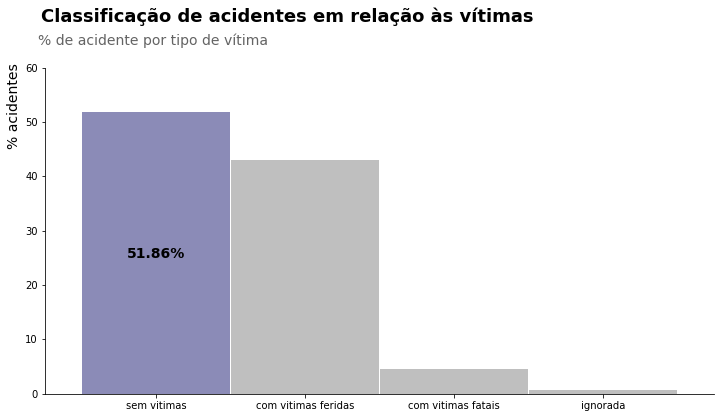

In [10]:
suptitle = 'Classificação de acidentes em relação às vítimas'
title = '% de acidente por tipo de vítima'
colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['classificacao_acidente'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.993, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 25, '51.86%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 60)
plt.show()

> <p style='text-align: justify;'><font size=2.85>51,86% dos acidentes ocorridos entre 2007 e 2021 foram sem vítimas</font></p>

Ano

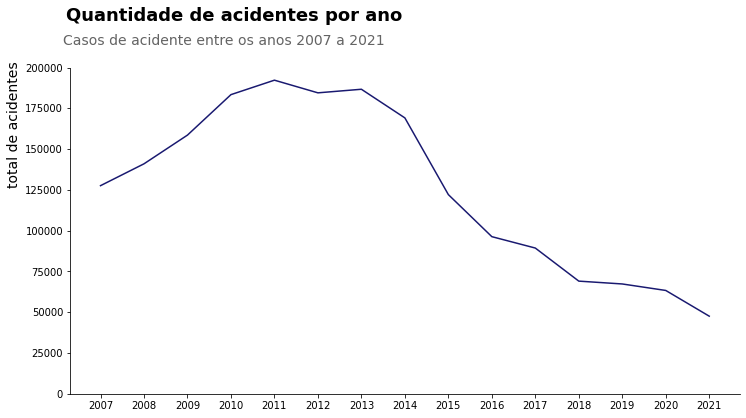

In [11]:
suptitle = 'Quantidade de acidentes por ano'
title = 'Casos de acidente entre os anos 2007 a 2021'

ticks = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

percentual = df.groupby(['ano'])['id'].count()
percentual.plot.line(figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('total de acidentes', fontsize=14, horizontalalignment='left', y=0.63)
plt.xlabel(None)
plt.xticks(ticks)
plt.ylim(0, 200000)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Houve um aumento gradativo das ocorrências de acidentes entre 2007 e 2011. Tivemos uma pequena queda em 2012 e após um aumento em 2013, as ocorrências voltaram a cair e mativeram esse padrão de queda até o ano 2021. De 2011 até os dias atuais, houve um redução de 7,61% nas ocorrências de acidentes.</font></p>

Estados

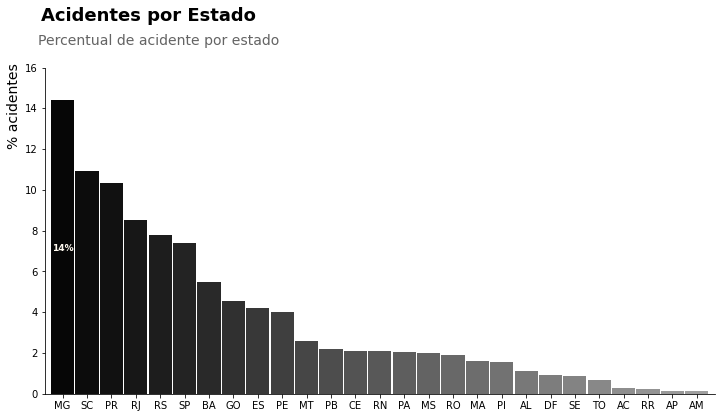

In [21]:
suptitle = 'Acidentes por Estado'
title = 'Percentual de acidente por estado'

percentual = round(df['uf'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 7, '14%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.ylim(0, 16)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais é o estado com o maior índice de acidentes, provavelmente por possuir a maior malha rodoviária do país.</font></p>

Vítimas fatais

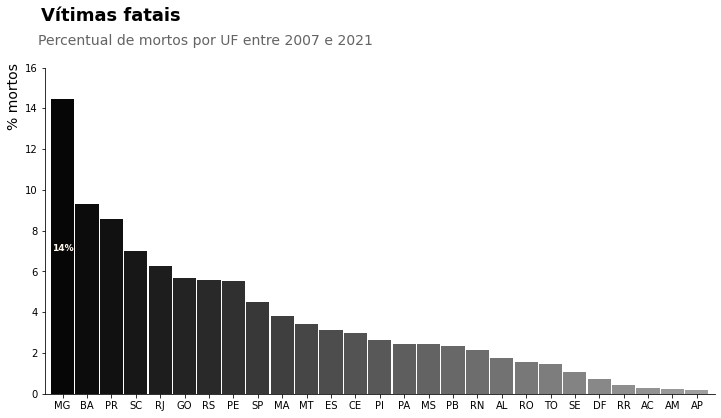

In [20]:
suptitle = 'Vítimas fatais'
title = 'Percentual de mortos por UF entre 2007 e 2021'

mortos = df.groupby(['uf'])['mortos'].sum().sort_values(ascending=False)
percentual = mortos/mortos.sum()*100
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% mortos', fontsize=14, horizontalalignment='left', y=0.81)
plt.text(0, 7, '14%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.grid(False)
plt.xlabel(None)
plt.ylim(0, 16)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais possui a maior quantidade de mortes em acidentes nas rodovias com 14.5%.</font></p>

Minas Gerais

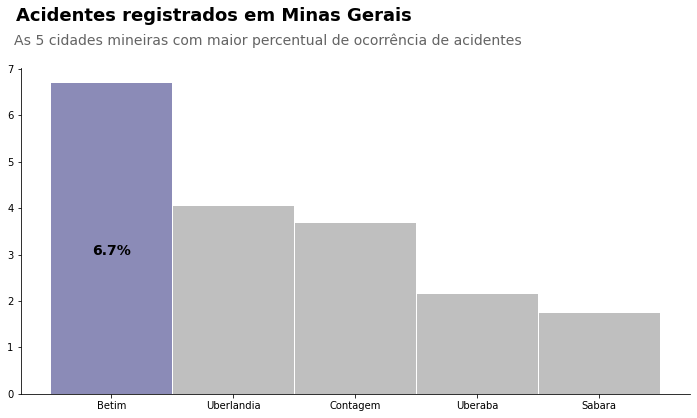

In [22]:
suptitle = 'Acidentes registrados em Minas Gerais'
title = 'As 5 cidades mineiras com maior percentual de ocorrência de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

municipios = municipios = df.query('uf== "MG"')
percentual = round(municipios['municipio'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(0, 3, '6.7%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Betim assume a liderança, sendo a cidade mineira com maior registro de ocorrências de acidentes.</font></p>

Causas de acidentes

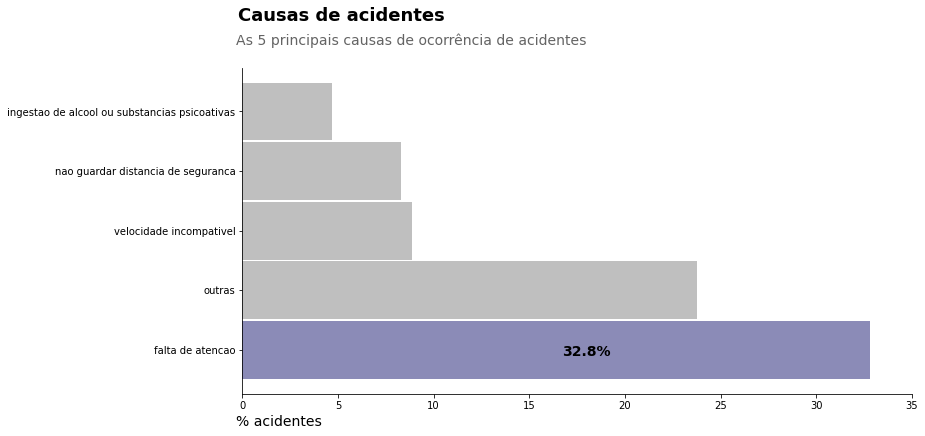

In [15]:
suptitle = 'Causas de acidentes'
title = 'As 5 principais causas de ocorrência de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['causa_acidente'].value_counts(normalize=True)*100, 2).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(18, -0.1, '32.8%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 35)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A principal causa de acidentes é a falta de atenção, com 33% de ocorrências nesse período.</font></p>

Fase do dia

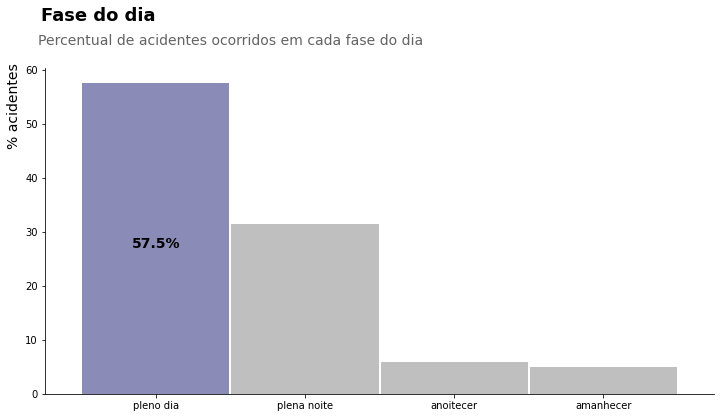

In [23]:
suptitle = 'Fase do dia'
title = 'Percentual de acidentes ocorridos em cada fase do dia'

colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['fase_dia'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 27, '57.5%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Em média, 57% dos acidentes ocorreram durante o dia</font></p>

Traçado da via

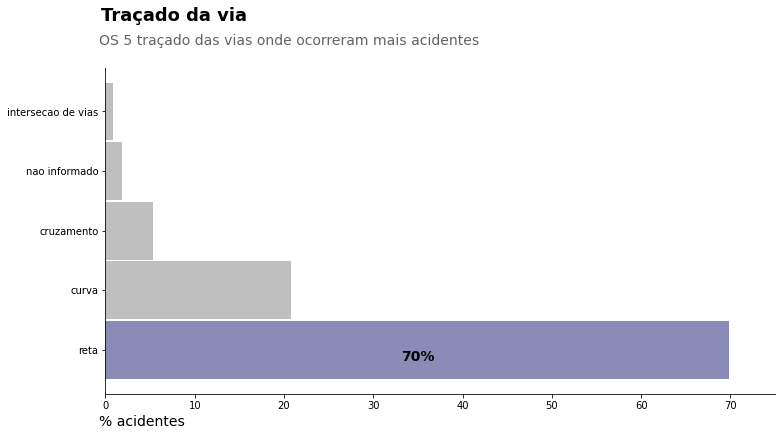

In [26]:
suptitle = 'Traçado da via'
title = 'OS 5 traçado das vias onde ocorreram mais acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tracado_via'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(35, -0.18, '70%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 75)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Cerca de 70% das ocorrências foram em pistas com traçado reto.</font></p>

Veículos

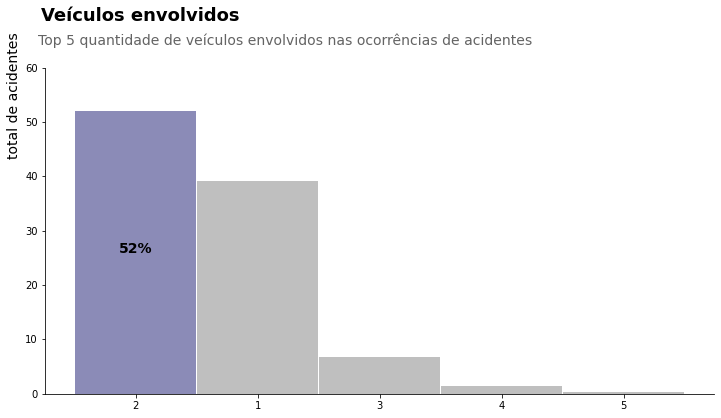

In [27]:
suptitle = 'Veículos envolvidos'
title = 'Top 5 quantidade de veículos envolvidos nas ocorrências de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

veiculos = round(df.groupby(['veiculos'])['id'].count()*100/len(df), 2).sort_values(ascending=False).head(5)
veiculos.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('total de acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.text(0, 26, '52%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.ylim(0, 60)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A maioria dos acidentes envolveu dois veículos.</font></p>

Condição meteorológica

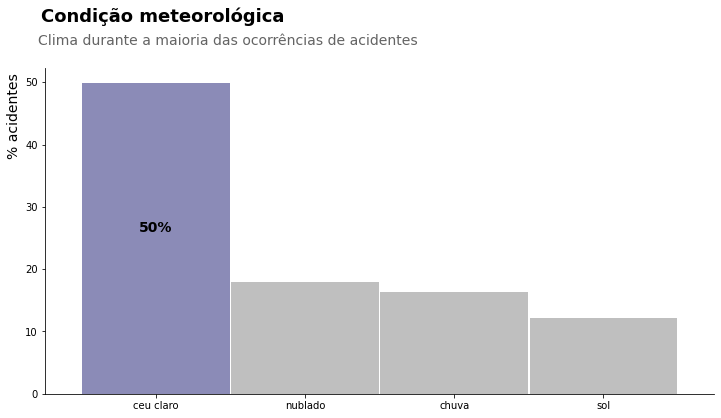

In [29]:
suptitle = 'Condição meteorológica'
title = 'Clima durante a maioria das ocorrências de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round((df.groupby(['condicao_metereologica'])['id'].count() * 100) / len(df), 2).sort_values(ascending=False).head(4)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.text(0, 26, '50%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Metade dos acidentes ocorreram em dias de céu claro.</font></p>

### Dependência entre variáveis

Estação do ano

In [ ]:
df['estacao_do_ano'] = df['data'].apply(estacaoAno)
df.groupby(['estacao_do_ano'])['id'].count().to_frame().reset_index()

In [ ]:
suptitle = 'Estações do ano'
title = 'Existe um aumento de acidentes dependendo da estação do ano?'

percentual = round((df.groupby(['estacao_do_ano'])['id'].count() * 100) / len(df), 2).sort_values(ascending=False)
percentual.plot.bar(width=1, alpha=0.5, figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.grid(False)
plt.show()

Dias da semana

In [ ]:
df['dia_semana'] = df['data'].apply(diaSemana)
df.groupby(['dia_semana'])['id'].count().to_frame().reset_index()

In [ ]:
suptitle = 'Dias da semana'
title = 'Existe um aumento de acidentes dependendo do dia da semana?'

percentual = round((df.groupby(['dia_semana'])['id'].count() * 100) / len(df), 2).sort_values(ascending=False)
percentual.plot.bar(width=1, alpha=0.5, figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.grid(False)
plt.show()

Região do Brasil

In [ ]:
df['regiao_pais'] = df['uf'].apply(regiaoPais)
df.groupby(['regiao_pais'])['id'].count().to_frame().reset_index()

In [ ]:
suptitle = 'Regiões do Brasil'
title = 'Existe um aumento de acidentes dependendo da região do país?'

percentual = round((df.groupby(['regiao_pais'])['id'].count() * 100) / len(df), 2).sort_values(ascending=False)
percentual.plot.bar(width=1, alpha=0.5, figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.grid(False)
plt.show()

### Correlação entre variáveis

In [ ]:
suptitle = 'Correlação de Pearson'
title = 'Análise da correlação entre as variáveis de interesse'

df['estacao_do_ano'] = df['estacao_do_ano'].map(mapaEstacao)
df['condicao_metereologica'] = df['condicao_metereologica'].map(mapaClima)
corr = df.drop(['id'], axis=1).corr().round(3)

plt.figure(figsize=(20, 8))
sns.heatmap(corr, linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.viridis, linecolor='white', annot=True)
plt.suptitle(suptitle, fontsize=18, y=1., horizontalalignment='left', x=0.445, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xticks(rotation=0, ha='center')
plt.yticks(rotation=0, ha='right')
plt.grid(False)
plt.show()

Estação do ano x acidente

In [ ]:
suptitle = 'Acidentes vs. estação do ano'
title = 'Análise da correlação entre acidentes e estações do ano'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='classificacao_acidente', y='estacao_do_ano', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('Classificação acidentes', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Estações do ano', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(-1, 16)
plt.show()

Clima x acidente

In [ ]:
suptitle = 'Acidente vs. clima'
title = 'Análise da correlação entre acidentes e o clima'

plt.rcParams['figure.figsize'] = [12, 6]
sns.scatterplot(x='classificacao_acidente', y='condicao_metereologica', data=df, color='#191970', s=50).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.125, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.001)
plt.xlabel('Classificação acidentes', fontsize=14, horizontalalignment='right', x=0.12)
plt.ylabel('Clima', fontsize=14, horizontalalignment='left', y=0.68)
plt.grid(False)
plt.ylim(-1, 16)
plt.show()